<a href="https://colab.research.google.com/github/2303A52058/Generative-AI/blob/main/gen_ai_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

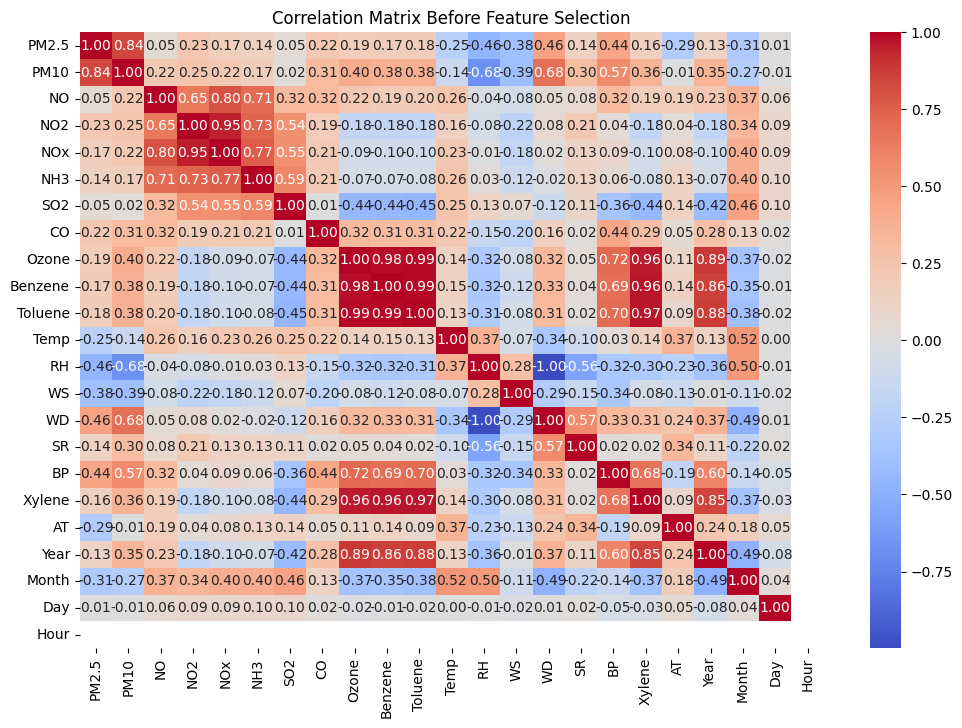

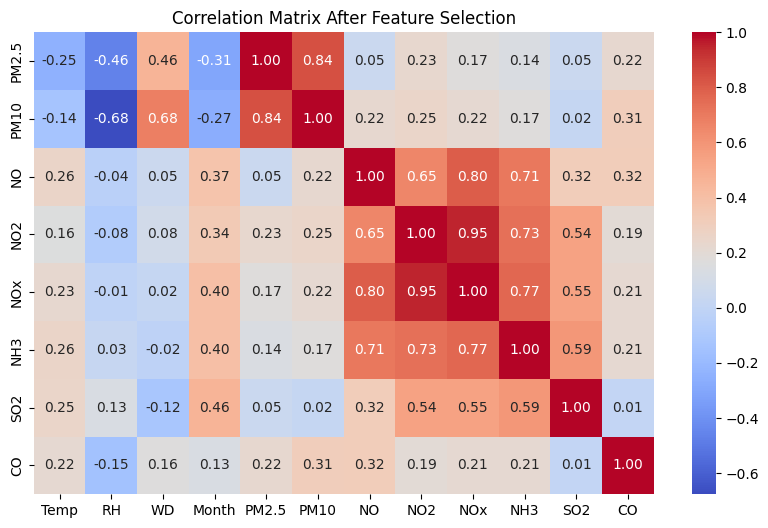

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.0327 - mae: 0.7801 - val_loss: 0.8266 - val_mae: 0.7175
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9514 - mae: 0.7403 - val_loss: 0.7516 - val_mae: 0.6666
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.8973 - mae: 0.7130 - val_loss: 0.7712 - val_mae: 0.6779
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.8776 - mae: 0.7122 - val_loss: 0.7530 - val_mae: 0.6734
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.9285 - mae: 0.7228 - val_loss: 0.7834 - val_mae: 0.7021
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9376 - mae: 0.7420 - val_loss: 0.7407 - val_mae: 0.6663
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8389 - mae: 0.6783 - val_loss: 0.7474 - val_mae: 0.6819
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9222 - mae: 0.7091 - val_loss: 0.7047 - val_mae: 0.6434
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.840

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step

🔍 Mean Absolute Error (MAE) Comparison:

PM2.5:
  • MAE Before Feature Selection : 10.09
  • MAE After Feature Selection  : 9.42



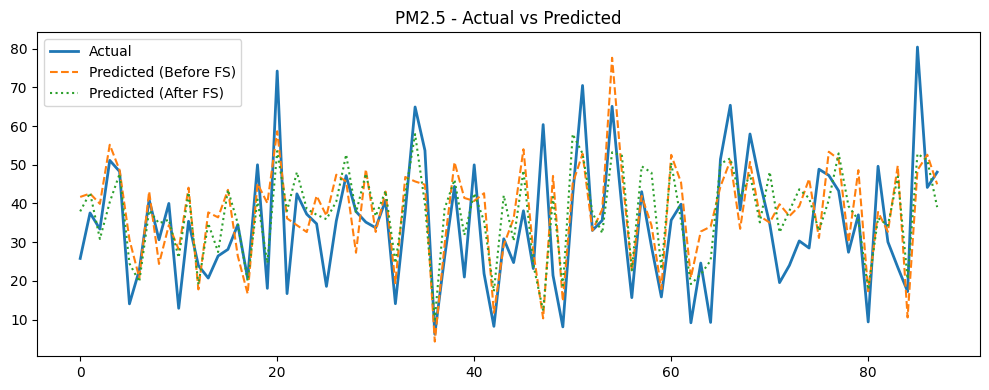

PM10:
  • MAE Before Feature Selection : 17.25
  • MAE After Feature Selection  : 15.99



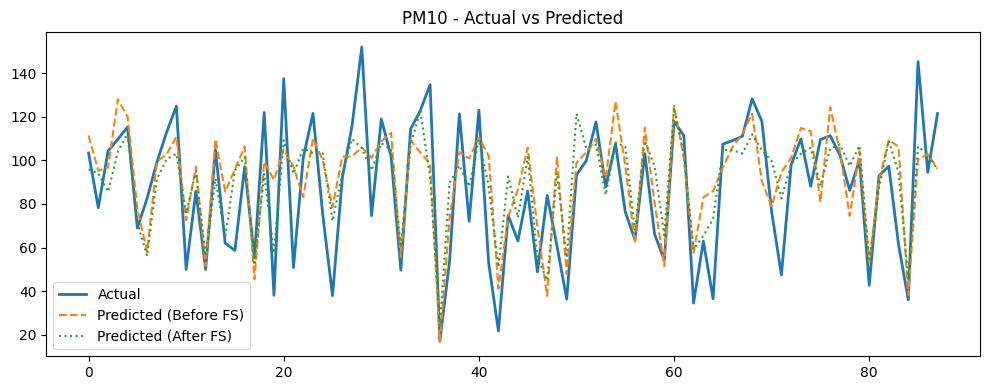

NO:
  • MAE Before Feature Selection : 2.15
  • MAE After Feature Selection  : 2.42



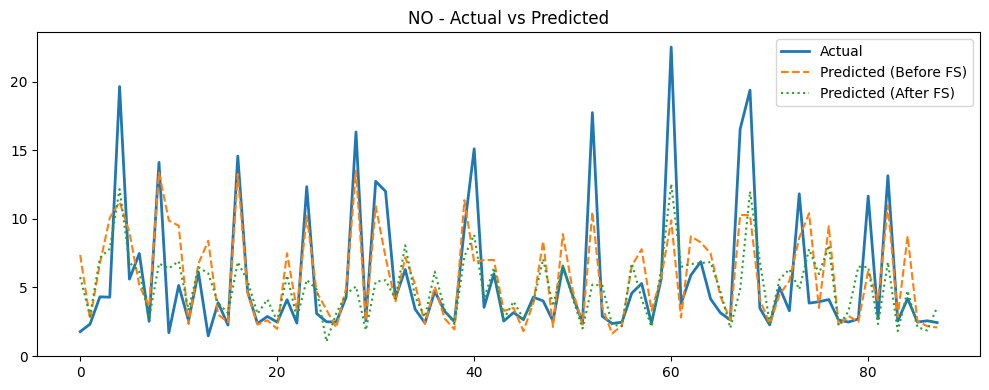

NO2:
  • MAE Before Feature Selection : 7.15
  • MAE After Feature Selection  : 5.91



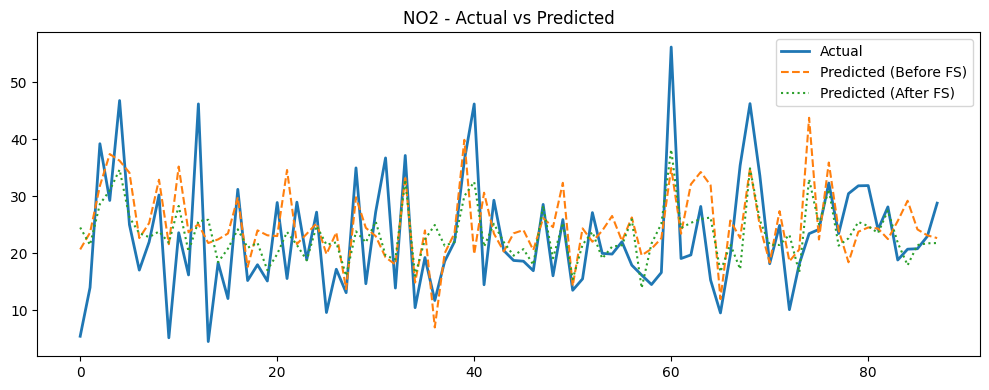

NOx:
  • MAE Before Feature Selection : 4.80
  • MAE After Feature Selection  : 4.12



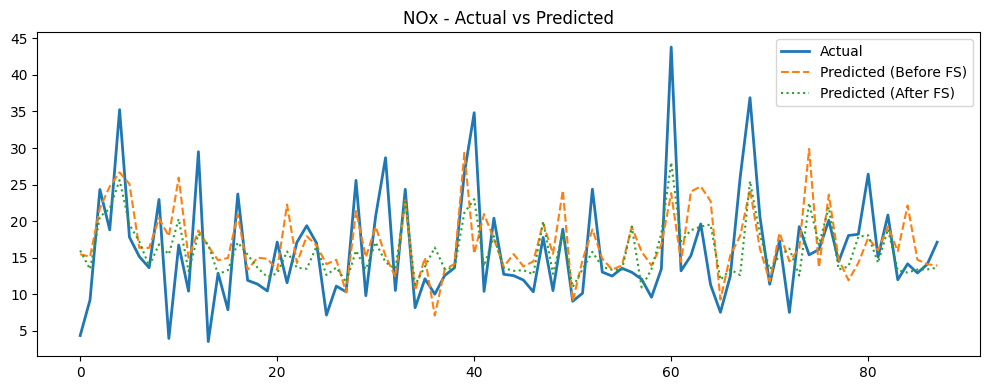

NH3:
  • MAE Before Feature Selection : 4.21
  • MAE After Feature Selection  : 3.92



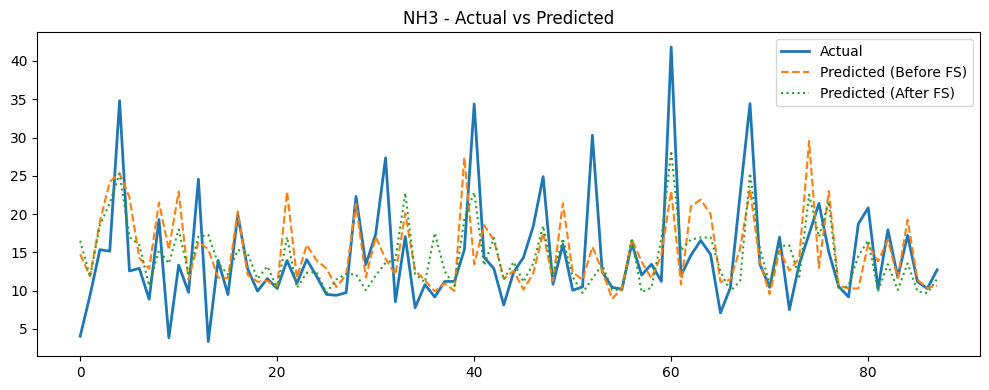

SO2:
  • MAE Before Feature Selection : 4.69
  • MAE After Feature Selection  : 4.79



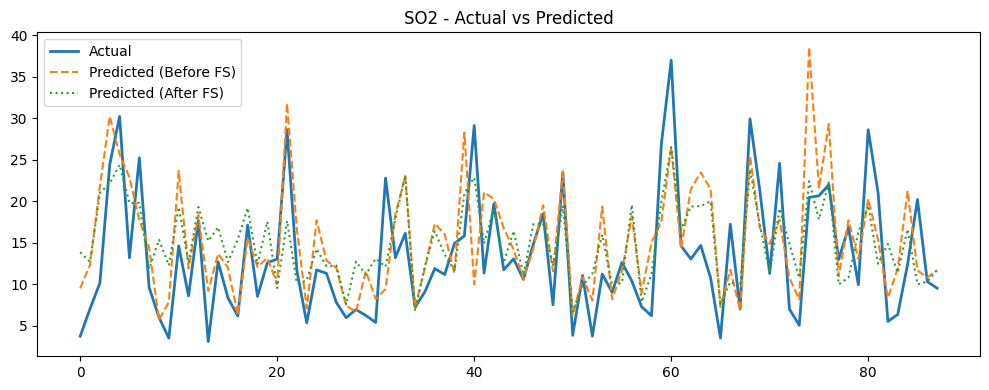

CO:
  • MAE Before Feature Selection : 0.30
  • MAE After Feature Selection  : 0.28



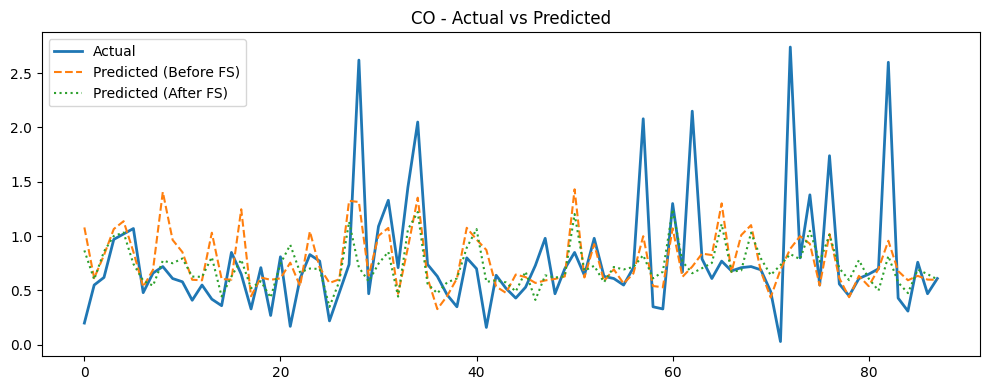

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Load and clean dataset
df = pd.read_excel("Data_Air Pollutant.xlsx")
df.dropna(inplace=True)

# Convert date and extract time features
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.dropna(subset=['From Date'], inplace=True)
df['Year'] = df['From Date'].dt.year
df['Month'] = df['From Date'].dt.month
df['Day'] = df['From Date'].dt.day
df['Hour'] = df['From Date'].dt.hour
df.drop(['From Date', 'To Date'], axis=1, inplace=True)

# Keep numeric data
df = df.select_dtypes(include=[np.number])

# Define multiple targets
target_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO']
X = df.drop(columns=target_columns)
y = df[target_columns]

# Correlation matrix before feature selection
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Before Feature Selection")
plt.show()

# Feature selection using RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y.mean(axis=1))  # Using mean of targets for importance
feature_importances = rf.feature_importances_
important_features = X.columns[feature_importances > np.mean(feature_importances)]
X_selected = X[important_features]

# Correlation matrix after feature selection
df_selected_corr = X_selected.copy()
df_selected_corr[target_columns] = y
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected_corr.corr()[target_columns].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix After Feature Selection")
plt.show()

# Create train-test splits
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize features
scaler_full = StandardScaler()
X_train_full = scaler_full.fit_transform(X_train_full)
X_test_full = scaler_full.transform(X_test_full)

scaler_sel = StandardScaler()
X_train_sel = scaler_sel.fit_transform(X_train_sel)
X_test_sel = scaler_sel.transform(X_test_sel)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape inputs for LSTM
X_train_full = X_train_full.reshape(X_train_full.shape[0], X_train_full.shape[1], 1)
X_test_full = X_test_full.reshape(X_test_full.shape[0], X_test_full.shape[1], 1)
X_train_sel = X_train_sel.reshape(X_train_sel.shape[0], X_train_sel.shape[1], 1)
X_test_sel = X_test_sel.reshape(X_test_sel.shape[0], X_test_sel.shape[1], 1)

# LSTM model function
def create_lstm_model(input_shape, output_dim):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dropout(0.2),
        Dense(output_dim)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# -------- Train model before feature selection --------
model_full = create_lstm_model((X_train_full.shape[1], 1), y_train.shape[1])
model_full.fit(X_train_full, y_train_scaled, epochs=50, batch_size=16,
               validation_data=(X_test_full, y_test_scaled), verbose=1)

# Predict & inverse transform
y_pred_full_scaled = model_full.predict(X_test_full)
y_pred_full = scaler_y.inverse_transform(y_pred_full_scaled)

# -------- Train model after feature selection --------
model_sel = create_lstm_model((X_train_sel.shape[1], 1), y_train.shape[1])
model_sel.fit(X_train_sel, y_train_scaled, epochs=50, batch_size=16,
              validation_data=(X_test_sel, y_test_scaled), verbose=1)

# Predict & inverse transform
y_pred_sel_scaled = model_sel.predict(X_test_sel)
y_pred_sel = scaler_y.inverse_transform(y_pred_sel_scaled)

# -------- Evaluate and plot MAE for each target --------
print("\n🔍 Mean Absolute Error (MAE) Comparison:\n")
for i, pollutant in enumerate(target_columns):
    mae_before = np.mean(np.abs(y_pred_full[:, i] - y_test.iloc[:, i].values))
    mae_after = np.mean(np.abs(y_pred_sel[:, i] - y_test.iloc[:, i].values))
    print(f"{pollutant}:")
    print(f"  • MAE Before Feature Selection : {mae_before:.2f}")
    print(f"  • MAE After Feature Selection  : {mae_after:.2f}\n")

    # Plotting actual vs predicted for both
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.iloc[:, i].values, label='Actual', linewidth=2)
    plt.plot(y_pred_full[:, i], label='Predicted (Before FS)', linestyle='--')
    plt.plot(y_pred_sel[:, i], label='Predicted (After FS)', linestyle=':')
    plt.title(f"{pollutant} - Actual vs Predicted")
    plt.legend()
    plt.tight_layout()
    plt.show()
